# NLP- PART A

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/GL/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blog-authorship-corpus/blogtext.csv


# 1. Load the dataset

In [3]:
#load the full set of the data
blog_df = pd.read_csv("/GL/input/blogtext.csv")

In [4]:
# check the shape of the data frame by using the shape attribute of the data frame
blog_df.shape

(681284, 7)

In [5]:
#check if the data frame is properly loaded using the sample() method
blog_df.sample(5)

,id,gender,age,topic,sign,date,text
568720,1929559,female,16,indUnk,Gemini,"16,May,2004",...i said hyrulian didnt i....ah da...
140169,1702682,male,23,indUnk,Scorpio,"06,August,2004",I'm starting a new blog. My old one...
79614,2047544,female,23,Technology,Gemini,"25,May,2004",urlLink never go swimming here. ...
663516,3034268,male,25,Education,Scorpio,"19,April,2004","The next morning Ok, that was fun. Yes,..."
287363,1967651,female,14,indUnk,Leo,"20,March,2004",Had more weird dreams last ni...


In [6]:
#Tip: As the dataset is large, use fewer rows. Check what is working well on your machine and decide accordingly.
#Limiting the data and using fewer rows as the data size is large
#blog_df = blog_df.head(10000)

blog_df = pd.read_csv("/GL/input/blogtext.csv",nrows=100000)

In [7]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [8]:
#check if the last 5 rows of the data frame using the tail() method
blog_df.tail()

,id,gender,age,topic,sign,date,text
99995,1709399,male,27,Student,Virgo,"18,September,2003",THE HINDU - 125 YEARS ...
99996,1709399,male,27,Student,Virgo,"16,September,2003",DILBERT & IIT-ans ...
99997,1709399,male,27,Student,Virgo,"12,September,2003",Case Study : How HP won $3 billion...
99998,1709399,male,27,Student,Virgo,"09,September,2003",Championing Chennai ...
99999,1709399,male,27,Student,Virgo,"05,September,2003",WEEKEND It...


In [9]:
#check the feature/columns  using the info method
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      100000 non-null  int64 
 1   gender  100000 non-null  object
 2   age     100000 non-null  int64 
 3   topic   100000 non-null  object
 4   sign    100000 non-null  object
 5   date    100000 non-null  object
 6   text    100000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


In [10]:
blog_df.gender.value_counts()

male      53358
female    46642
Name: gender, dtype: int64

In [11]:
#pp.ProfileReport(blog_df)

In [12]:
#chceck for na values
blog_df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

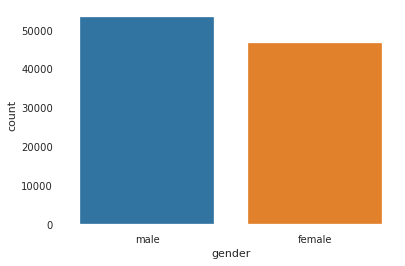

In [13]:
sns.countplot(x='gender',data=blog_df)

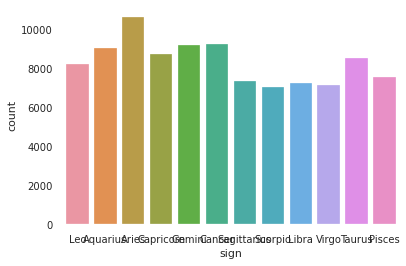

In [14]:
sns.countplot(x='sign',data=blog_df)

In [15]:
#chceck for null values
blog_df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [16]:
# remove unwanted chars other than alphanumeric
pattern = "[^\w ]"
blog_df.text = blog_df.text.apply(lambda s : re.sub(pattern,"",s))

In [17]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members Drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoos Toolbar I can no...


In [18]:
#covert text to lower
blog_df.text = blog_df.text.apply(lambda s: s.lower())

In [19]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can no...


In [20]:
#remove unwanted spaces
blog_df.text = blog_df.text.apply(lambda s: s.strip())

In [21]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and 45 mb of pd...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes van der la...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde maak je e...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can now capture the...


In [22]:
#remove stopwords
stopwords=set(stopwords.words('english'))

In [23]:
blog_df.text = blog_df.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )

In [24]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...


In [25]:
# drop id and date columns
blog_df.drop(labels=['id','date'], axis=1,inplace=True)

In [26]:
blog_df.head()

,gender,age,topic,sign,text
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing testing
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...


In [27]:
blog_df['labels'] = blog_df.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)

In [28]:
blog_df.head()

,gender,age,topic,sign,text,labels
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


In [29]:
#drop  gender,age,topic & sign as they are already merged to labels column
blog_df.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [30]:
blog_df.head()

,text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


In [31]:
X= blog_df.text
y = blog_df.labels

In [32]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)

In [33]:
print(X_train.shape)
print(y_train.shape)

(80000,)
(80000,)


In [34]:
print(X_test.shape)
print(y_test.shape)

(20000,)
(20000,)


In [35]:
X_test

6448                      bird buries head mashed potatoes
50680    ok seriously ruined day like mad right wouldnt...
814      astro vs braves got back minute maid stadium d...
20354    greetings welcome first ever blog concept behi...
49224    walks door room always brightens perfect figur...
                               ...                        
47661    hey cool jo problem understandable sounds lots...
56256    last night went see new harry potter movie hon...
92555    urllink instant messages come bearing malice i...
36328    srajan gamers sections class 8th entered compu...
73345    monqiue got back together wasnt quite dramatic...
Name: text, Length: 20000, dtype: object

In [36]:
cvect = CountVectorizer(ngram_range=(1,2))

In [37]:
#Feed SMS data to CountVectorizer
cvect.fit(X_train)

#Check the vocablury size
len(cvect.vocabulary_)

4517090

In [38]:
cvect.get_feature_names()

['00',
 '00 damarcus',
 '00 damn',
 '00 doesnt',
 '00 dont',
 '00 draw',
 '00 games',
 '00 laughed',
 '00 lil',
 '00 morning',
 '00 really',
 '00 silver',
 '00 sometimes',
 '00 soooooo',
 '00 sq',
 '00 tcr1',
 '00 tie',
 '00 uppercase_75_100',
 '00 watch',
 '00 well',
 '000',
 '000 address',
 '000 available',
 '000 best',
 '000 calories',
 '000 cheaper',
 '000 comptes',
 '000 could',
 '000 duration',
 '000 et',
 '000 first',
 '000 ft',
 '000 fulltime',
 '000 good',
 '000 heh',
 '000 leaving',
 '000 nothing',
 '000 odd',
 '000 people',
 '000 pounds',
 '000 rupees',
 '000 seats',
 '000 sec',
 '000 seems',
 '000 straight',
 '000 subject',
 '000 thats',
 '000 years',
 '000 yen',
 '0000',
 '0000 arent',
 '0000 blinking',
 '0000 hopefully',
 '0000 hrs',
 '0000 new',
 '0000 showed',
 '0000 still',
 '0000 subject',
 '000000',
 '000000 flickrframe',
 '000000 fontfamily',
 '000000 zero',
 '000000000000000000000000167',
 '000000000000000000000000167 grams',
 '000000000000000000000section',
 '0000

In [39]:
X_train_ct = cvect.transform(X_train)

In [40]:
type(X_train_ct)

scipy.sparse.csr.csr_matrix

In [41]:
X_train_ct

<80000x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 13894625 stored elements in Compressed Sparse Row format>

In [42]:
X_train_ct[0]

<1x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 483 stored elements in Compressed Sparse Row format>

In [43]:
X_test_ct = cvect.transform(X_test)

In [44]:
X_test_ct

<20000x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 2633973 stored elements in Compressed Sparse Row format>

In [45]:
cvect.get_feature_names()[:10]

['00',
 '00 damarcus',
 '00 damn',
 '00 doesnt',
 '00 dont',
 '00 draw',
 '00 games',
 '00 laughed',
 '00 lil',
 '00 morning']

In [46]:
print(X_train_ct)

  (0, 10607)	1
  (0, 10627)	1
  (0, 11033)	1
  (0, 11034)	1
  (0, 13953)	1
  (0, 13954)	1
  (0, 42119)	1
  (0, 42120)	1
  (0, 43719)	1
  (0, 43827)	1
  (0, 67010)	1
  (0, 67011)	1
  (0, 92180)	1
  (0, 92184)	1
  (0, 113011)	1
  (0, 113907)	1
  (0, 120596)	2
  (0, 123016)	2
  (0, 181859)	1
  (0, 181920)	1
  (0, 244805)	1
  (0, 244878)	1
  (0, 258494)	1
  (0, 258690)	1
  (0, 263762)	1
  :	:
  (79999, 489553)	1
  (79999, 490590)	1
  (79999, 685736)	1
  (79999, 686275)	1
  (79999, 987793)	1
  (79999, 990497)	1
  (79999, 1275446)	1
  (79999, 1664615)	1
  (79999, 1668927)	1
  (79999, 1934343)	1
  (79999, 1936464)	1
  (79999, 2334456)	1
  (79999, 2335872)	1
  (79999, 2680191)	1
  (79999, 2682769)	1
  (79999, 2689599)	1
  (79999, 2690051)	1
  (79999, 3250596)	1
  (79999, 3250640)	1
  (79999, 3892432)	1
  (79999, 3894880)	1
  (79999, 3948360)	1
  (79999, 3948560)	1
  (79999, 4052512)	1
  (79999, 4052642)	1


In [47]:
print(X_test_ct)

  (0, 466872)	1
  (0, 584973)	1
  (0, 584975)	1
  (0, 1781828)	1
  (0, 2442107)	1
  (0, 2442126)	1
  (0, 3036818)	1
  (1, 8711)	1
  (1, 9452)	1
  (1, 21144)	1
  (1, 67661)	1
  (1, 67771)	1
  (1, 74496)	1
  (1, 78471)	1
  (1, 120596)	2
  (1, 121772)	1
  (1, 126920)	1
  (1, 157801)	2
  (1, 157893)	1
  (1, 178920)	1
  (1, 182108)	1
  (1, 182417)	1
  (1, 183363)	2
  (1, 194027)	1
  (1, 202361)	5
  :	:
  (19999, 3380016)	1
  (19999, 3561611)	1
  (19999, 3575363)	1
  (19999, 3710895)	1
  (19999, 3711708)	1
  (19999, 3757318)	1
  (19999, 3899740)	1
  (19999, 3899777)	1
  (19999, 3934893)	2
  (19999, 3935016)	1
  (19999, 3948360)	1
  (19999, 3952264)	1
  (19999, 4013296)	1
  (19999, 4013848)	1
  (19999, 4021460)	1
  (19999, 4023561)	1
  (19999, 4223852)	1
  (19999, 4223914)	1
  (19999, 4284488)	1
  (19999, 4285835)	1
  (19999, 4304472)	1
  (19999, 4330559)	1
  (19999, 4330886)	1
  (19999, 4363071)	1
  (19999, 4423255)	1


In [48]:
label_counts=dict()

for labels in blog_df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [49]:
label_counts

{'male': 53358,
 '15': 1,
 'Student': 22122,
 'Leo': 8230,
 '33': 1,
 'InvestmentBanking': 244,
 'Aquarius': 9050,
 'female': 46642,
 '14': 1,
 'indUnk': 33097,
 'Aries': 10637,
 '25': 1,
 'Capricorn': 8723,
 '17': 1,
 'Gemini': 9225,
 '23': 1,
 'Non-Profit': 1326,
 'Cancer': 9253,
 'Banking': 354,
 '37': 1,
 'Sagittarius': 7366,
 '26': 1,
 '24': 1,
 'Scorpio': 7049,
 '27': 1,
 'Education': 5553,
 '45': 1,
 'Engineering': 2332,
 'Libra': 7250,
 'Science': 1090,
 '34': 1,
 '41': 1,
 'Communications-Media': 2830,
 'BusinessServices': 626,
 'Sports-Recreation': 406,
 'Virgo': 7134,
 'Taurus': 8530,
 'Arts': 5031,
 'Pisces': 7553,
 '44': 1,
 '16': 1,
 'Internet': 2251,
 'Museums-Libraries': 308,
 'Accounting': 528,
 '39': 1,
 '35': 1,
 'Technology': 8484,
 '36': 1,
 'Law': 360,
 '46': 1,
 'Consulting': 905,
 'Automotive': 124,
 '42': 1,
 'Religion': 1081,
 '13': 1,
 'Fashion': 1898,
 '38': 1,
 '43': 1,
 'Publishing': 1079,
 '40': 1,
 'Marketing': 726,
 'LawEnforcement-Security': 368,
 'Hum

In [50]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [51]:
y_train = binarizer.fit_transform(y_train)

In [52]:
y_test = binarizer.transform(y_test)

In [53]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [54]:
y_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

# Choosing a classifier and Fitting the classifier, making predictions and getting the accuracy 


In [55]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [76]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [57]:
Ypred=model.predict(X_test_ct)

In [58]:
Ypred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [59]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    
    
def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))
    
    

In [61]:
display_metrics_micro(y_test,Ypred)

Accuracy score:  0.10845
F1 score: Micro 0.47778666971533096
Average precision score: Micro 0.2893610144399952
Average recall score: Micro 0.34826666666666667


In [62]:
display_metrics_macro(y_test,Ypred)

Accuracy score:  0.10845
F1 score: Macro 0.15645950196516092
Average recall score: MAcro 0.10385900478403969


In [63]:
display_metrics_weighted(y_test,Ypred)

Accuracy score:  0.10845
F1 score: weighted 0.43672341512174734
Average precision score: weighted 0.3900962132264077
Average recall score: weighted 0.34826666666666667


In [64]:
preds = Ypred[:15]
actuals = y_test[:15]

In [65]:
five_actual = binarizer.inverse_transform(actuals)
five_actual

[('Aries', 'Fashion', 'male'),
 ('Libra', 'Student', 'male'),
 ('Sagittarius', 'indUnk', 'male'),
 ('Aquarius', 'indUnk', 'male'),
 ('Cancer', 'Student', 'male'),
 ('Pisces', 'Transportation', 'male'),
 ('Arts', 'Capricorn', 'female'),
 ('Capricorn', 'Student', 'male'),
 ('Cancer', 'Religion', 'male'),
 ('Libra', 'indUnk', 'male'),
 ('Aquarius', 'female', 'indUnk'),
 ('Capricorn', 'Consulting', 'female'),
 ('Virgo', 'indUnk', 'male'),
 ('Internet', 'Sagittarius', 'male'),
 ('Scorpio', 'Technology', 'male')]

In [66]:
five_pred = binarizer.inverse_transform(preds)
five_pred

[(),
 ('Student', 'female'),
 ('female',),
 ('male',),
 ('Cancer', 'female'),
 ('Pisces', 'Transportation', 'male'),
 ('female',),
 ('Student',),
 ('Religion', 'female'),
 ('male',),
 ('female',),
 ('Consulting', 'female'),
 (),
 ('male',),
 ('Scorpio', 'male')]

In [67]:
print(binarizer.inverse_transform(Ypred)[877])
print(binarizer.inverse_transform(y_test)[877])

('Student', 'Virgo', 'male')
('Student', 'Virgo', 'male')


In [68]:
print(binarizer.inverse_transform(Ypred)[514])
print(binarizer.inverse_transform(y_test)[514])

()
('Libra', 'female', 'indUnk')


In [69]:
print(binarizer.inverse_transform(Ypred)[99])
print(binarizer.inverse_transform(y_test)[99])

('Cancer', 'Education', 'Pisces', 'male')
('Education', 'Pisces', 'male')


In [70]:
print(binarizer.inverse_transform(Ypred)[499])
print(binarizer.inverse_transform(y_test)[499])

('Pisces', 'male')
('Pisces', 'Student', 'female')


In [71]:
print(binarizer.inverse_transform(Ypred)[699])
print(binarizer.inverse_transform(y_test)[699])

('Student', 'female')
('Libra', 'Student', 'male')


In [72]:
import random
j=[]
for i in range(5):
    j.append(random.randint(300,len(Ypred)))
   
print(j)

for k in j:    
    print(binarizer.inverse_transform(Ypred)[k])
    print(binarizer.inverse_transform(y_test)[k])
    
        

[5443, 7949, 2331, 5609, 4969]
('male',)
('Cancer', 'Technology', 'male')
()
('Pisces', 'Student', 'female')
('female', 'indUnk')
('Capricorn', 'Consulting', 'female')
('Virgo', 'indUnk', 'male')
('Virgo', 'indUnk', 'male')
()
('Pisces', 'Student', 'male')


In [73]:
Ypred_inversed = binarizer.inverse_transform(Ypred)
y_test_inversed = binarizer.inverse_transform(y_test)
for i in range(5):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test_ct[i],
        ','.join(y_test_inversed[i]),
        ','.join(Ypred_inversed[i])
    ))

Text:	  (0, 466872)	1
  (0, 584973)	1
  (0, 584975)	1
  (0, 1781828)	1
  (0, 2442107)	1
  (0, 2442126)	1
  (0, 3036818)	1
True labels:	Aries,Fashion,male
Predicted labels:	


Text:	  (0, 8711)	1
  (0, 9452)	1
  (0, 21144)	1
  (0, 67661)	1
  (0, 67771)	1
  (0, 74496)	1
  (0, 78471)	1
  (0, 120596)	2
  (0, 121772)	1
  (0, 126920)	1
  (0, 157801)	2
  (0, 157893)	1
  (0, 178920)	1
  (0, 182108)	1
  (0, 182417)	1
  (0, 183363)	2
  (0, 194027)	1
  (0, 202361)	5
  (0, 204077)	1
  (0, 205064)	1
  (0, 239970)	1
  (0, 240321)	1
  (0, 241441)	1
  (0, 241749)	1
  (0, 253541)	9
  :	:
  (0, 4449080)	1
  (0, 4449591)	1
  (0, 4449622)	1
  (0, 4450746)	3
  (0, 4451462)	1
  (0, 4451494)	1
  (0, 4452125)	1
  (0, 4456092)	2
  (0, 4456694)	1
  (0, 4463749)	2
  (0, 4464331)	2
  (0, 4469199)	1
  (0, 4469266)	1
  (0, 4471407)	1
  (0, 4490043)	1
  (0, 4490712)	1
  (0, 4497129)	1
  (0, 4497648)	1
  (0, 4499761)	2
  (0, 4500860)	1
  (0, 4501718)	1
  (0, 4503106)	1
  (0, 4503264)	1
  (0, 4505960)	1
  (0, 4506082)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

def build_model_train(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    return model

In [75]:
models = ['lr','svm','nbayes']
for model in models:
    model = build_model_train(X_train_ct,y_train,model=model)
    model.fit(X_train_ct,y_train)
    Ypred=model.predict(X_test_ct)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    display_metrics_micro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_macro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_weighted(y_test,Ypred)
    print("\n")
    print("\n")
    



**displaying  metrics for the mode OneVsRestClassifier(estimator=LogisticRegression(penalty='l1',
                                                 solver='liblinear'))

Accuracy score:  0.1499
F1 score: Micro 0.5055115064784373
Average precision score: Micro 0.3016687513604208
Average recall score: Micro 0.3921




Accuracy score:  0.1499
F1 score: Macro 0.2233577781659072
Average recall score: MAcro 0.16134988196477368




Accuracy score:  0.1499
F1 score: weighted 0.4857341564232289
Average precision score: weighted 0.4048024307111789
Average recall score: weighted 0.3921






**displaying  metrics for the mode OneVsRestClassifier(estimator=LinearSVC(dual=False, penalty='l1'))

Accuracy score:  0.13315
F1 score: Micro 0.47228834493599825
Average precision score: Micro 0.27802788985432436
Average recall score: Micro 0.35051666666666664




Accuracy score:  0.13315
F1 score: Macro 0.21645249556428775
Average recall score: MAcro 0.14894273849057116




Accuracy score:  0.13315
F1 sco